In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("superstore.csv")

In [3]:
import numpy as np

In [4]:
df.shape

(51290, 27)

In [5]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [7]:
df.dtypes

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [8]:
df=df.drop_duplicates()

In [9]:
df.fillna(df.mean(numeric_only=True),inplace=True)

In [11]:

df['Date'] = pd.to_datetime(df['Order.Date'])


In [12]:
df.dtypes

Category                  object
City                      object
Country                   object
Customer.ID               object
Customer.Name             object
Discount                 float64
Market                    object
记录数                        int64
Order.Date                object
Order.ID                  object
Order.Priority            object
Product.ID                object
Product.Name              object
Profit                   float64
Quantity                   int64
Region                    object
Row.ID                     int64
Sales                      int64
Segment                   object
Ship.Date                 object
Ship.Mode                 object
Shipping.Cost            float64
State                     object
Sub.Category              object
Year                       int64
Market2                   object
weeknum                    int64
Date              datetime64[ns]
dtype: object

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

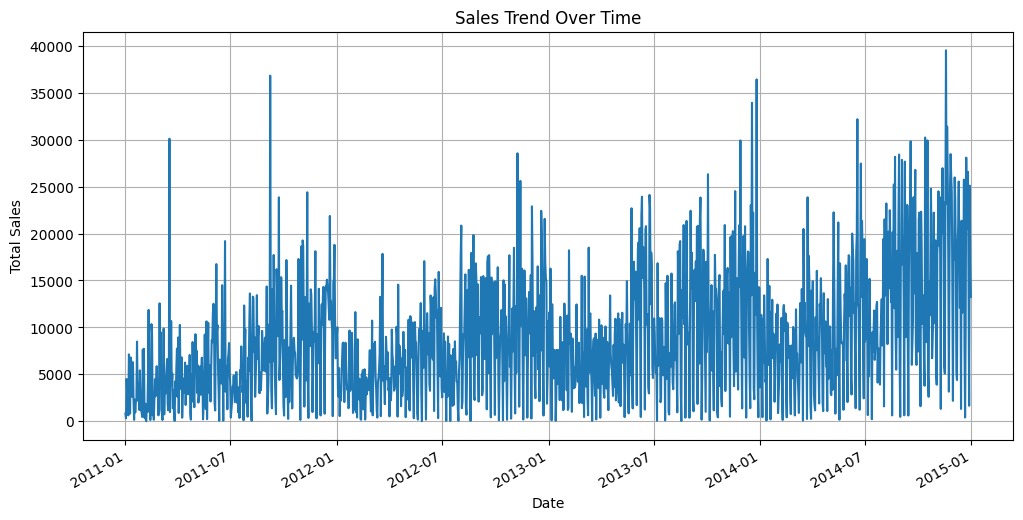

In [14]:
sales_trend = df.groupby('Date')['Sales'].sum()

# Plot time series
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

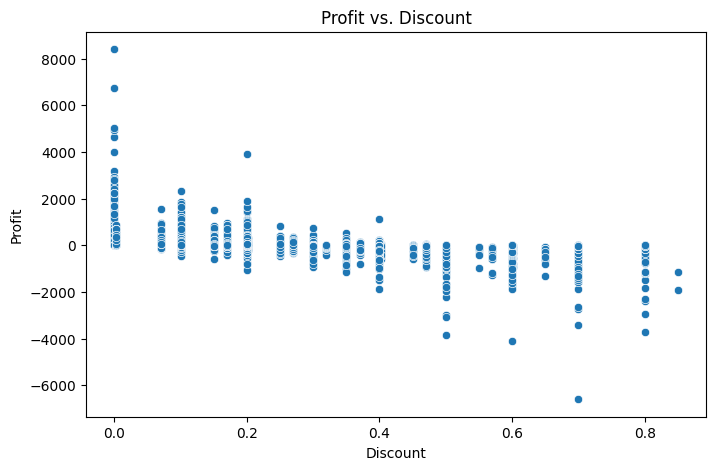

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Discount'], y=df['Profit'])
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

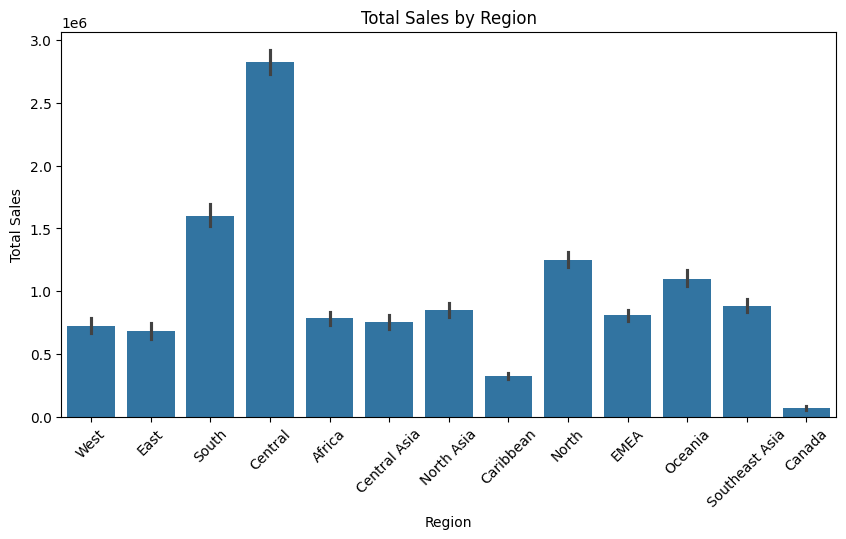

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Region'], y=df['Sales'], estimator=sum)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

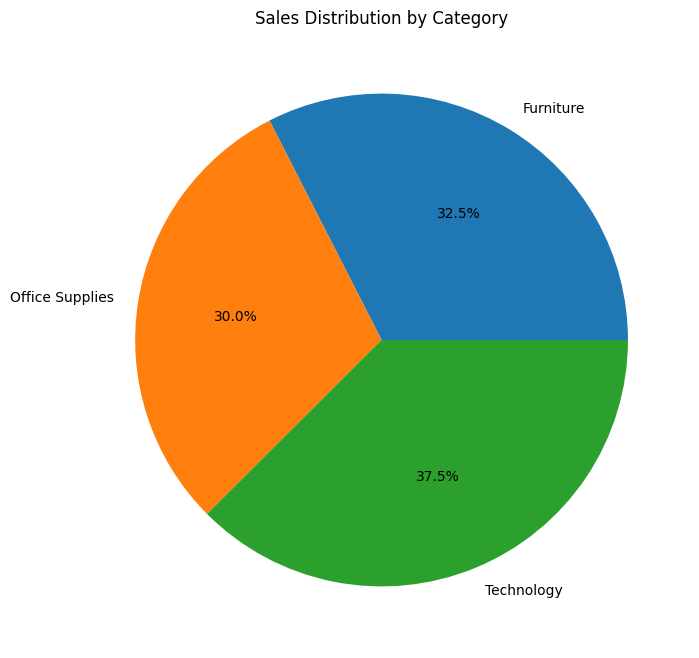

In [17]:
df.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
df = df[['Sales', 'Profit', 'Discount']].dropna()  # Selecting relevant columns & dropping nulls

# Define features (X) and target (y)
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 241642.61630233363
R-squared Score: 0.11428823787896591
Model Coefficients: [  1.49036295 175.31119854]
Intercept: 177.69252951610423


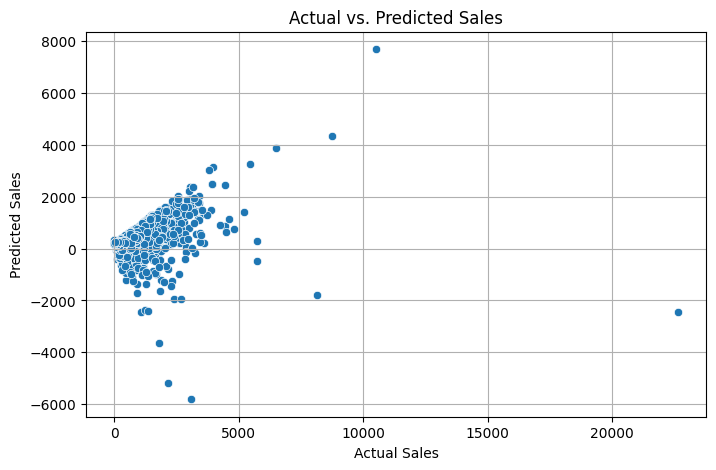

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid()
plt.show()
